In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [2]:
df=pd.read_csv("/content/CITYBANK.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP   TRADE  VALUE (mn)     VOLUME
0  439 2018-05-08     CITYBANK  30.5  ...  30.7   347.0      14.650   476443.0
1  438 2018-06-08     CITYBANK  30.8  ...  30.4   365.0      23.843   787366.0
2  437 2018-07-08     CITYBANK  30.7  ...  30.6   424.0      25.470   830120.0
3  436 2018-08-08     CITYBANK  31.7  ...  30.6   982.0      59.484  1902891.0
4  435 2018-09-08     CITYBANK  31.8  ...  31.8  1007.0      65.347  2042307.0

[5 rows x 12 columns]

In [3]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


#       DATE TRADING CODE  LTP*  ...   YCP   TRADE  VALUE (mn)     VOLUME
36  403 2018-01-10     CITYBANK  32.1  ...  32.1   324.0      25.289   785961.0
59  380 2018-01-11     CITYBANK  31.6  ...  31.8   537.0      37.801  1194699.0
37  402 2018-02-10     CITYBANK  32.7  ...  32.2   399.0      20.460   631149.0
79  360 2018-02-12     CITYBANK  30.5  ...  31.2   340.0      27.198   885534.0
16  423 2018-03-09     CITYBANK  34.5  ...  35.5  1181.0      62.509  1796220.0

[5 rows x 12 columns]

In [4]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE  LTP*  HIGH  ...   YCP  TRADE  VALUE (mn)     VOLUME
DATE                                      ...                                    
2018-01-10  403     CITYBANK  32.1  32.6  ...  32.1  324.0      25.289   785961.0
2018-01-11  380     CITYBANK  31.6  31.8  ...  31.8  537.0      37.801  1194699.0
2018-02-10  402     CITYBANK  32.7  32.7  ...  32.2  399.0      20.460   631149.0

[3 rows x 11 columns]

In [5]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [6]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [7]:
df['volatility'] = df['volatility']*100

In [8]:
import matplotlib.pyplot as plt 

In [9]:
df=df.reset_index()['volatility']

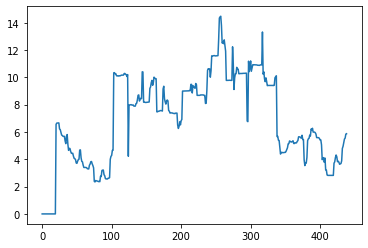

In [10]:
plt.plot(df)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
X_test.shape

(31, 100, 1)

In [18]:
from google.colab import drive

In [19]:
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsCitybank/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsCitybank/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsCitybank/model3.h5"

In [21]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 83ms/step - loss: 0.1953 - val_loss: 0.0192
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0465 - val_loss: 0.0770
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0248 - val_loss: 0.0374
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0192 - val_loss: 0.0544
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0180 - val_loss: 0.0409
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0118 - val_loss: 0.0487
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0092 - val_loss: 0.0722
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0110 - val_loss: 0.0637
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0069 - val_loss: 0.0453
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0106 - val_loss: 0.0793
Epoch 11/100
7/7 [=

In [23]:
model1.save(filepath1)

In [24]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 305ms/step - loss: 0.3425 - val_loss: 0.0682
Epoch 2/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0473 - val_loss: 0.0114
Epoch 3/100
7/7 [==============================] - 1s 137ms/step - loss: 0.0282 - val_loss: 0.0258
Epoch 4/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0157 - val_loss: 0.0576
Epoch 5/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0153 - val_loss: 0.0265
Epoch 6/100
7/7 [==============================] - 1s 138ms/step - loss: 0.0134 - val_loss: 0.0410
Epoch 7/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0135 - val_loss: 0.0486
Epoch 8/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0114 - val_loss: 0.0385
Epoch 9/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0122 - val_loss: 0.0461
Epoch 10/100
7/7 [==============================] - 1s 138ms/step - loss: 0.0125 - val_loss: 0.0446
Epoch 11/

In [25]:
model2.save(filepath2)

In [26]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 14s 579ms/step - loss: 0.2805 - val_loss: 0.1997
Epoch 2/100
7/7 [==============================] - 2s 250ms/step - loss: 0.0417 - val_loss: 0.0179
Epoch 3/100
7/7 [==============================] - 2s 239ms/step - loss: 0.0240 - val_loss: 0.0835
Epoch 4/100
7/7 [==============================] - 2s 236ms/step - loss: 0.0151 - val_loss: 0.0609
Epoch 5/100
7/7 [==============================] - 2s 258ms/step - loss: 0.0104 - val_loss: 0.0425
Epoch 6/100
7/7 [==============================] - 2s 240ms/step - loss: 0.0116 - val_loss: 0.0682
Epoch 7/100
7/7 [==============================] - 2s 244ms/step - loss: 0.0115 - val_loss: 0.0522
Epoch 8/100
7/7 [==============================] - 2s 244ms/step - loss: 0.0097 - val_loss: 0.0518
Epoch 9/100
7/7 [==============================] - 2s 237ms/step - loss: 0.0092 - val_loss: 0.0533
Epoch 10/100
7/7 [==============================] - 2s 239ms/step - loss: 0.0077 - val_loss: 0.0486
Epoch 11

In [27]:
model3.save(filepath3)

In [28]:
from keras.models import load_model

In [29]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsCitybank/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [30]:
print(len(all_models))

3


In [31]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsCitybank/model1.h5'
model = load_model(f1)


In [32]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [33]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [34]:
#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

3.362181365083544

In [35]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [36]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [37]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [38]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [39]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [40]:
#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

In [41]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [42]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [43]:
stacked_model = define_stacked_model(all_models)

In [44]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [45]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [46]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.29147732, 0.30215234, 0.22730176],
       [0.28878063, 0.29641205, 0.23160146],
       [0.2748025 , 0.28557453, 0.2305037 ],
       [0.26996002, 0.28273734, 0.22508378],
       [0.25655323, 0.27082905, 0.22708836],
       [0.2521375 , 0.26740655, 0.22376248],
       [0.24485716, 0.25858697, 0.22911188],
       [0.25457147, 0.26937968, 0.21690844],
       [0.24707782, 0.25888938, 0.2279134 ],
       [0.21561171, 0.21932939, 0.2693508 ],
       [0.21212547, 0.21420442, 0.27597675],
       [0.2270451 , 0.23384015, 0.25503027],
       [0.23957741, 0.24716806, 0.24477635],
       [0.24377431, 0.25087237, 0.243744  ],
       [0.25990945, 0.25926965, 0.2517194 ],
       [0.27279973, 0.26610112, 0.26015082],
       [0.2768456 , 0.26254845, 0.2801545 ],
       [0.2952906 , 0.27830663, 0.27911898],
       [0.30289584, 0.28593764, 0.27958357],
       [0.2935558 , 0.27940324, 0.28429726],
       [0.28202415, 0.2701444 , 0.2895196 ],
       [0.25942433, 0.24815121, 0.30489427],
       [0.

In [47]:
yhat=scaler.inverse_transform(yhat)

In [48]:
x, y, z = yhat.T

In [49]:
avg = (x+y+z)/3

In [50]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [51]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

0.7663455925190606

In [52]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

0.7991422289154121

In [53]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

0.8783415892643232

In [54]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

0.7283839183797436

In [55]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,y)
print('MAE: %f' % mae)


MAE: 0.699314
